In [1]:
# !pip install pyspark
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
sns.set_palette('rainbow')
sns.set_style('whitegrid')
import plotly.express as px
# these 2 lines fix a sporatic loading error in plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
sns.set_style('darkgrid')
# pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col


from sklearn.pipeline import Pipeline
# from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

CSV_FILE= '/home/mobile/miniSpark/data/Final database.csv'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 23.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845499 sha256=6c115fc57299225bd368d084898fa3ef0697809eaf91172faa3063face9e5143
  Stored in directory: /home/mobile/.cache/pip/wheels/51/c8/18/298a4ced8ebb3ab8a7d26a7198c0cc7035abb906bde94a4c4b
Successfully built pyspark


In [7]:
spark = SparkSession.builder.master("local[2]").appName("Spotify-Huge-Dataset").getOrCreate() #.enableHiveSupport()
spark

In [8]:
# Old way depreciated in 3.0.0
sc = spark.sparkContext
sqlContext = SQLContext(sc)
# sqlContext = SQLContext(spark)

In [17]:
df = spark.read.option("header", True).csv(CSV_FILE)
df = df.withColumn("Release_date", F.to_date("Release_date", "yyyy-MM-dd"))
numerical_features = ['danceability', 'energy', 'instrumentalness', 'valence', 'liveliness', 'speechiness', 'acoustics',
                      'instrumentalness', 'tempo', 'duration_ms', 
                      'time_signature', 'Days_since_release', 'n_words']

for c in numerical_features:
    df = df.withColumn(c, df[c].cast("float"))
    
cols_to_drop = ['syuzhet_norm', 'bing_norm', 'afinn_norm', 'nrc_norm', 'syuzhet', 'bing'] 
for c in cols_to_drop:
    df.drop(c).collect()
    
df.printSchema()
# df.show(n=1, truncate=False, vertical=True)

22/12/26 10:32:31 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


22/12/26 10:32:33 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Country, Uri, Popularity, Title, Artist, Album/Single, Genre, Artist_followers, Explicit, Album, Release_date, Track_number, Tracks_in_album, danceability, energy, key, loudness, mode, speechiness, acoustics, instrumentalness, liveliness, valence, tempo, duration_ms, time_signature, Genre_new, Days_since_release, Released_after_2017, Explicit_false, Explicit_true, album, compilation, single, bolero, boy band, country, dance/electronic, else, funk, hip hop, house, indie, jazz, k-pop, latin, metal, opm, pop, r&b/soul, rap, reggae, reggaeton, rock, trap, bing_norm, afinn_norm, nrc_norm, syuzhet, bing, afinn, nrc, anger, anticipation, disgust, fear, joy, sadness, surprise, trust, negative, positive, n_words, anger_norm, anticipation_norm, disgust_norm, fear_norm, joy_norm, sadness_norm, surprise_norm, trust_norm, negative_norm, positive_norm, anger_norm2, anticipation_norm2, disgust_norm2, fear_nor

22/12/26 10:33:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Country, Uri, Popularity, Title, Artist, Album/Single, Genre, Artist_followers, Explicit, Album, Release_date, Track_number, Tracks_in_album, danceability, energy, key, loudness, mode, speechiness, acoustics, instrumentalness, liveliness, valence, tempo, duration_ms, time_signature, Genre_new, Days_since_release, Released_after_2017, Explicit_false, Explicit_true, album, compilation, single, bolero, boy band, country, dance/electronic, else, funk, hip hop, house, indie, jazz, k-pop, latin, metal, opm, pop, r&b/soul, rap, reggae, reggaeton, rock, trap, syuzhet_norm, afinn_norm, nrc_norm, syuzhet, bing, afinn, nrc, anger, anticipation, disgust, fear, joy, sadness, surprise, trust, negative, positive, n_words, anger_norm, anticipation_norm, disgust_norm, fear_norm, joy_norm, sadness_norm, surprise_norm, trust_norm, negative_norm, positive_norm, anger_norm2, anticipation_norm2, disgust_norm2, fear_

22/12/26 10:34:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Country, Uri, Popularity, Title, Artist, Album/Single, Genre, Artist_followers, Explicit, Album, Release_date, Track_number, Tracks_in_album, danceability, energy, key, loudness, mode, speechiness, acoustics, instrumentalness, liveliness, valence, tempo, duration_ms, time_signature, Genre_new, Days_since_release, Released_after_2017, Explicit_false, Explicit_true, album, compilation, single, bolero, boy band, country, dance/electronic, else, funk, hip hop, house, indie, jazz, k-pop, latin, metal, opm, pop, r&b/soul, rap, reggae, reggaeton, rock, trap, syuzhet_norm, bing_norm, nrc_norm, syuzhet, bing, afinn, nrc, anger, anticipation, disgust, fear, joy, sadness, surprise, trust, negative, positive, n_words, anger_norm, anticipation_norm, disgust_norm, fear_norm, joy_norm, sadness_norm, surprise_norm, trust_norm, negative_norm, positive_norm, anger_norm2, anticipation_norm2, disgust_norm2, fear_n

22/12/26 10:34:57 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Country, Uri, Popularity, Title, Artist, Album/Single, Genre, Artist_followers, Explicit, Album, Release_date, Track_number, Tracks_in_album, danceability, energy, key, loudness, mode, speechiness, acoustics, instrumentalness, liveliness, valence, tempo, duration_ms, time_signature, Genre_new, Days_since_release, Released_after_2017, Explicit_false, Explicit_true, album, compilation, single, bolero, boy band, country, dance/electronic, else, funk, hip hop, house, indie, jazz, k-pop, latin, metal, opm, pop, r&b/soul, rap, reggae, reggaeton, rock, trap, syuzhet_norm, bing_norm, afinn_norm, syuzhet, bing, afinn, nrc, anger, anticipation, disgust, fear, joy, sadness, surprise, trust, negative, positive, n_words, anger_norm, anticipation_norm, disgust_norm, fear_norm, joy_norm, sadness_norm, surprise_norm, trust_norm, negative_norm, positive_norm, anger_norm2, anticipation_norm2, disgust_norm2, fear

22/12/26 10:35:38 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Country, Uri, Popularity, Title, Artist, Album/Single, Genre, Artist_followers, Explicit, Album, Release_date, Track_number, Tracks_in_album, danceability, energy, key, loudness, mode, speechiness, acoustics, instrumentalness, liveliness, valence, tempo, duration_ms, time_signature, Genre_new, Days_since_release, Released_after_2017, Explicit_false, Explicit_true, album, compilation, single, bolero, boy band, country, dance/electronic, else, funk, hip hop, house, indie, jazz, k-pop, latin, metal, opm, pop, r&b/soul, rap, reggae, reggaeton, rock, trap, syuzhet_norm, bing_norm, afinn_norm, nrc_norm, bing, afinn, nrc, anger, anticipation, disgust, fear, joy, sadness, surprise, trust, negative, positive, n_words, anger_norm, anticipation_norm, disgust_norm, fear_norm, joy_norm, sadness_norm, surprise_norm, trust_norm, negative_norm, positive_norm, anger_norm2, anticipation_norm2, disgust_norm2, fea

22/12/26 10:36:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Country, Uri, Popularity, Title, Artist, Album/Single, Genre, Artist_followers, Explicit, Album, Release_date, Track_number, Tracks_in_album, danceability, energy, key, loudness, mode, speechiness, acoustics, instrumentalness, liveliness, valence, tempo, duration_ms, time_signature, Genre_new, Days_since_release, Released_after_2017, Explicit_false, Explicit_true, album, compilation, single, bolero, boy band, country, dance/electronic, else, funk, hip hop, house, indie, jazz, k-pop, latin, metal, opm, pop, r&b/soul, rap, reggae, reggaeton, rock, trap, syuzhet_norm, bing_norm, afinn_norm, nrc_norm, syuzhet, afinn, nrc, anger, anticipation, disgust, fear, joy, sadness, surprise, trust, negative, positive, n_words, anger_norm, anticipation_norm, disgust_norm, fear_norm, joy_norm, sadness_norm, surprise_norm, trust_norm, negative_norm, positive_norm, anger_norm2, anticipation_norm2, disgust_norm2, 

root
 |-- Country0: string (nullable = true)
 |-- Uri: string (nullable = true)
 |-- Popularity: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Artist: string (nullable = true)
 |-- Album/Single: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Artist_followers: string (nullable = true)
 |-- Explicit: string (nullable = true)
 |-- Album9: string (nullable = true)
 |-- Release_date: date (nullable = true)
 |-- Track_number: string (nullable = true)
 |-- Tracks_in_album: string (nullable = true)
 |-- danceability: float (nullable = true)
 |-- energy: float (nullable = true)
 |-- key: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: float (nullable = true)
 |-- acoustics: float (nullable = true)
 |-- instrumentalness: float (nullable = true)
 |-- liveliness: float (nullable = true)
 |-- valence: float (nullable = true)
 |-- tempo: float (nullable = true)
 |-- duration_ms: float (nul

##  EDA

In [18]:
# data set 안에 고유한 노래 수
df.select(["Title","Artist"]).distinct().count()

56241

In [19]:
print("Dataset Shape using spark syntax:\n",(df.count(), len(df.columns)))

Dataset Shape using spark syntax:
 (170633, 151)


In [20]:
# 지난 3년 동안 스포티파이에서 하루에 가장 많이 재생된 상위 200위 안에 든 노래
result_df = (df.groupBy("Artist")
               .count()
               .orderBy("count", ascending=False)
               .limit(10)
               .toPandas()
            )
px.bar(result_df, y='Artist', x='count', title='Most Prolific Artists')

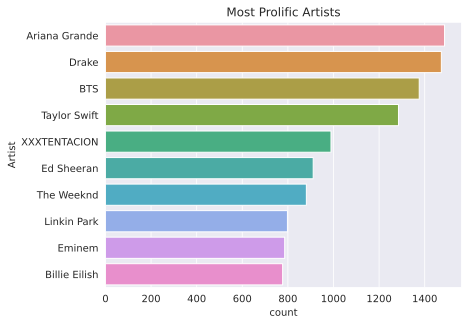

In [21]:
# 위와 같은 그림 이쁘게
sns.barplot(data=result_df, y='Artist', x='count').set_title('Most Prolific Artists');

In [22]:
#  메모리에 테이블의 임시 view 만들기
df.createOrReplaceTempView("df_table")

In [23]:
print("Now using the SQL Context. We can check it's the same length as before")
query = """
    SELECT Count(*) as Dataset_Length
    FROM df_table
"""
res = spark.sql(query).show()

Now using the SQL Context. We can check it's the same length as before
+--------------+
|Dataset_Length|
+--------------+
|        170633|
+--------------+



In [24]:
# 미국에서 가장 인기 있는 아티스트(노래의 인기 합계)
query = """
SELECT
                                    Artist, 
       ROUND(SUM(Popularity), 2) AS Populartiy
FROM df_table
WHERE USA == 1
GROUP BY Artist
ORDER BY AVG(Popularity) DESC
LIMIT 10
"""

res = spark.sql(query)
res.show(10, truncate=False)

+------------------------------+----------+
|Artist                        |Populartiy|
+------------------------------+----------+
|Post Malone - Quavo           |130719.15 |
|XXXTENTACION - Trippie Redd   |97016.35  |
|Meek Mill - Drake             |83235.95  |
|Post Malone - 21 Savage       |159633.25 |
|Billie Eilish - Khalid        |79693.9   |
|Marshmello - Bastille         |74560.5   |
|Cardi B - Bad Bunny - J Balvin|74381.6   |
|Migos - Lil Uzi Vert          |70138.2   |
|BlocBoy JB - Drake            |69576.75  |
|Kendrick Lamar - Zacari       |67838.15  |
+------------------------------+----------+



In [48]:
# 2020년에 발표된 곡
(df.filter(F.year(df['Release_date']) == 2020)
   .select('Title', 'Artist','Release_date', 'Genre')
   .distinct()
   .show(10, truncate=False)
)

+------------------------------+-----------------------------------+------------+-------------------------+
|Title                         |Artist                             |Release_date|Genre                    |
+------------------------------+-----------------------------------+------------+-------------------------+
|instant destiny               |Tame Impala                        |2020-02-14  |australian psych         |
|blinding lights               |The Weeknd                         |2020-03-20  |canadian contemporary r&b|
|bichiyal                      |Bad Bunny - Yaviah                 |2020-02-28  |latin                    |
|rich rich                     |Ufo361                             |2020-02-21  |german cloud rap         |
|yummy                         |Justin Bieber                      |2020-02-14  |canadian pop             |
|25/8                          |Bad Bunny                          |2020-02-28  |latin                    |
|hawái                      

In [25]:
# 1939년에 발표된 곡
(df.filter(F.year(df['Release_date']) == 1939)
   .select('Title', 'Artist','Release_date', 'Genre')
   .distinct()
   .show(5, truncate=False)
)

+--------------------------------------------+------------+------------+---------------+
|Title                                       |Artist      |Release_date|Genre          |
+--------------------------------------------+------------+------------+---------------+
|moonlight serenade - 2005 remastered version|Glenn Miller|1939-09-01  |adult standards|
+--------------------------------------------+------------+------------+---------------+



## 10년간 가장 인기 있는 노래

In [49]:
query = """
SELECT
        ROUND(Year(Release_date), -1) AS Decade,
        Round(Popularity, 2)          AS Popularity,
                                         Title,
                                         Artist
FROM df_table
INNER JOIN (SELECT Max(Popularity) as mp
            FROM df_table
            WHERE ROUND(Year(Release_date), -1) IS NOT NULL
            AND USA == 1
            GROUP BY ROUND(Year(Release_date), -1)
           ) AS temp
ON temp.mp = df_table.Popularity
ORDER BY Decade ASC, Popularity ASC
"""

res = spark.sql(query)
res.toPandas().drop_duplicates(subset='Decade', keep="last")

,Decade,Popularity,Title,Artist
10,NaN,98.60,say it loud - im black and im proud,James Brown
11,1940.0,840.50,have yourself a merry little christmas,Judy Garland
12,1950.0,997.60,mele kalikimaka,Bing Crosby - The Andrews Sisters
15,1960.0,9704.95,blue christmas,Elvis Presley
16,1970.0,98.40,me and julio down by the schoolyard,Paul Simon
24,1980.0,98.60,listen to her heart,Tom Petty and the Heartbreakers
32,1990.0,98.40,home for the holidays - 1959 version,Perry Como
40,2000.0,9476.05,feliz navidad,José Feliciano
75,2010.0,98.60,suomirokkia,Aknestik
383,2020.0,99912.30,drip too hard,Lil Baby - Gunna


In [26]:
# highly optimized version of the above query via scalar-aggregate-reduction
query = """
SELECT
    ROUND(Year(Release_date), -1) as Decade,
    ROUND(Max(Popularity), 2) as Popularity,
    SUBSTRING(MAX(CONCAT(LPAD(Popularity, 11, 0), Title)), 12) AS Title,
    SUBSTRING(MAX(CONCAT(LPAD(Popularity, 11, 0), Artist)), 12) AS Artist
FROM
    df_table
WHERE
    ROUND(Year(Release_date), -1) IS NOT NULL
    AND USA == 1
GROUP BY Decade
ORDER BY Decade ASC
"""

spark.sql(query).show()

+------+----------+--------------------+--------------------+
|Decade|Popularity|               Title|              Artist|
+------+----------+--------------------+--------------------+
|  1940|     840.5|     white christmas|Bing Crosby - Ken...|
|  1950|     997.6|ill be home for c...|         Bing Crosby|
|  1960|   9704.95|    jingle bell rock|         Bobby Helms|
|  1970|      98.4|what christmas me...|       Stevie Wonder|
|  1980|      98.6|dreams - 2004 rem...|       Fleetwood Mac|
|  1990|     97.75|            spoonman|         Soundgarden|
|  2000|   9476.05|       feliz navidad|      José Feliciano|
|  2010|     97.75|         tongue tied|           Grouplove|
|  2020|   99912.3|       drip too hard|    Lil Baby - Gunna|
+------+----------+--------------------+--------------------+



In [27]:
# 10년마다 가장 인기 있는 장르
query = """
SELECT Genre, COUNT(*) AS Tally
FROM df_table
GROUP BY Genre
ORDER BY Tally DESC
"""
spark.sql(query).show(5)

+---------+-----+
|    Genre|Tally|
+---------+-----+
|dance pop|25351|
|    latin| 7591|
|      pop| 7146|
|    k-pop| 4053|
|      n-a| 3952|
+---------+-----+
only showing top 5 rows



In [28]:
query = """
SELECT
      ROUND(Year(Release_date), -1) AS Decade,
      Genre, COUNT(Genre)           AS counts
FROM  df_table
WHERE ROUND(Year(Release_date), -1) IS NOT NULL
GROUP BY Decade, Genre
ORDER BY COUNT(Genre) DESC
"""

res = (spark.sql(query)
            .dropDuplicates(subset=['Decade'])
            .orderBy('Decade')
            .show()
      )
# res.toPandas().drop_duplicates(subset='Decade', keep="first")

+------+-------------------+------+
|Decade|              Genre|counts|
+------+-------------------+------+
|  1900|vocal harmony group|     1|
|  1930|        movie tunes|     1|
|  1940|    adult standards|    39|
|  1950|    adult standards|    36|
|  1960|    adult standards|   186|
|  1970|       classic soul|   152|
|  1980|         album rock|   379|
|  1990|         irish rock|   170|
|  2000|  alternative metal|   477|
|  2010|          dance pop|  1052|
|  2020|          dance pop| 23496|
+------+-------------------+------+



In [65]:
# k-pop 아티스트별 가장 인기있는 음방
query = """
SELECT Title, Artist, Release_date, MAX(Popularity)
FROM df_table
WHERE Genre = "k-pop"
GROUP BY Title, Artist, Release_date
ORDER BY MAX(Popularity) DESC
LIMIT 30
"""

res = spark.sql(query).show()

+--------------------+----------------+------------+-----------------+
|               Title|          Artist|Release_date|  max(Popularity)|
+--------------------+----------------+------------+-----------------+
|               tempo|             EXO|  2018-11-02|          9983.35|
|    the truth untold|BTS - Steve Aoki|  2018-05-18|9965.099999999997|
|          black swan|             BTS|  2020-01-17|            995.2|
|               apple|         GFRIEND|  2020-07-13|           993.35|
|           boombayah|       BLACKPINK|  2016-08-08|9924.850000000004|
|  dont call me again|           TWICE|  2020-06-01|            99.45|
|we are bulletproo...|             BTS|  2020-02-21|            99.45|
|             im fine|             BTS|  2018-08-24|            99.35|
|                 ddd|            EXID|  2017-11-07|99.20000000000002|
|                 one|          SuperM|  2020-09-25|99.20000000000002|
|  intro: serendipity|             BTS|  2017-09-18|             99.2|
|  tri

In [51]:
# 저스틴 비버의 음반
query = """
SELECT Title, Artist, Release_date, MAX(Popularity)
FROM df_table
WHERE Artist == "Justin Bieber"
GROUP BY Title, Artist, Release_date
LIMIT 10
"""

res = spark.sql(query).show()

+--------------------+-------------+------------+-----------------+
|               Title|       Artist|Release_date|  max(Popularity)|
+--------------------+-------------+------------+-----------------+
|       all around me|Justin Bieber|  2020-02-14|            849.0|
|as long as you lo...|Justin Bieber|  2013-01-01|65.60000000000001|
|    at least for now|Justin Bieber|  2020-02-14|             71.2|
|           available|Justin Bieber|  2020-02-14|            891.1|
|            been you|Justin Bieber|  2015-11-13|             78.4|
|           boyfriend|Justin Bieber|  2012-01-01|           153.95|
|             changes|Justin Bieber|  2020-02-14|              9.6|
|            children|Justin Bieber|  2015-11-13|             44.0|
|      christmas love|Justin Bieber|  2011-01-01|             98.4|
|      come around me|Justin Bieber|  2020-02-14|89.60000000000002|
+--------------------+-------------+------------+-----------------+



In [29]:
# 각 트랙마다 가장 인기가 많았던 날
query = """
SELECT Title, Artist, Release_date, MAX(Popularity)
FROM df_table
WHERE Artist == "Paulo Londra"
GROUP BY Title, Artist, Release_date
LIMIT 10
"""

res = spark.sql(query).show()

+--------------------+------------+------------+------------------+
|               Title|      Artist|Release_date|   max(Popularity)|
+--------------------+------------+------------+------------------+
|          adan y eva|Paulo Londra|  2018-11-05| 849.6000000000001|
|          adan y eva|Paulo Londra|  2019-05-23| 57194.60000000001|
|    chica paranormal|Paulo Londra|  2018-07-24|           6341.35|
|    chica paranormal|Paulo Londra|  2019-05-23|           9409.05|
|condenado para el...|Paulo Londra|  2017-12-04| 617.6000000000001|
|condenado para el...|Paulo Londra|  2018-11-03|             852.0|
|condenado para el...|Paulo Londra|  2019-05-23| 586.7500000000001|
|confiado & tranquilo|Paulo Londra|  2017-05-30|375.20000000000016|
|        cámara lenta|Paulo Londra|  2017-10-07| 8088.800000000004|
|      demasiado loco|Paulo Londra|  2019-05-23| 6337.350000000001|
+--------------------+------------+------------+------------------+



## 수십년 동안의 음악 변화

In [52]:
sound_features = ['danceability', 'energy', 'instrumentalness', 'valence', 'liveliness', 'speechiness', 'acoustics']
col_names = ['Decade']
col_names.extend(sound_features)

df_music_features = (df.sample(.2, seed=42)
                       .groupBy(F.round(F.year(df.Release_date), -1))
                       .agg({feature: 'mean' for feature in sound_features})
                       .toDF(*col_names)
                       .orderBy('Decade')
                       .toPandas()
                       .dropna(axis=0)
                    )
fig = px.line(df_music_features, x='Decade', y=sound_features, title='수십년 동안의 음악 변화')
fig.show()

In [57]:
# !pip install koreanize-matplotlib

import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:00:01m


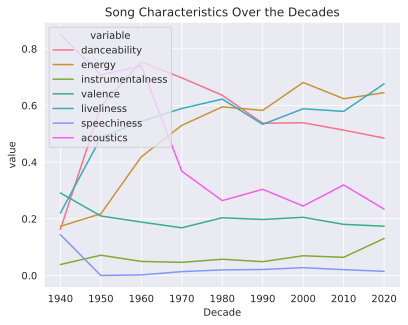

In [59]:
# same as above but with seaborn. (sometimes plotly doesn't show up in the published notebok)
sns.lineplot(data=pd.melt(df_music_features, ['Decade']), x='Decade', y='value', hue='variable').set_title('Song Characteristics Over the Decades');

In [39]:
## !pip install --quiet kaggle

ERROR: Could not find a version that satisfies the requirement kaggle_secrets (from versions: none)
ERROR: No matching distribution found for kaggle_secrets
